<br/><center><font size="19" ><b>Pooling with TensorFlow-GPU</b></font></center> 

<img src='imgs/tf_cuda.png' width='600' />

<img src='./imgs/bizz.jpg'/>

In [1]:
from AI_Decomposed import * 

# Small Tensorflow tutorial

For simplicity, all the previous notebooks have been using standard Python lists.
Tensorflow uses 'tensors' in a 'flow'.  

### 0. start Tensorflow session

In [2]:
import tensorflow as tf
config = tf.ConfigProto(device_count = {'GPU': 0}) 
sess = tf.InteractiveSession(config=config)

### 1. create sample list

In [3]:
lst = [0,1,2,3]
lst

[0, 1, 2, 3]

### 2. create 2x2 tensor

In [4]:
t2x2 = tf.reshape(lst,[2,2]) # convert to 2 x 2 tensor
t2x2

<tf.Tensor 'Reshape:0' shape=(2, 2) dtype=int32>

### 3. proof 

In [5]:
print(t2x2.eval())  # show 2 x 2 matrix

[[0 1]
 [2 3]]


### 4. clean up

In [6]:
del lst 
del t2x2
sess.close()
del sess

# GPU Pooling with Tensorflow

In [7]:
config = tf.ConfigProto(device_count = {'GPU': 0}) 
sess = tf.InteractiveSession(config=config)

### 1. grab green channel from image

In [8]:
image_file = './imgs/bizz.jpg'
[height, width ,red, green, blue] = image_meta(image_file)

403 x 940


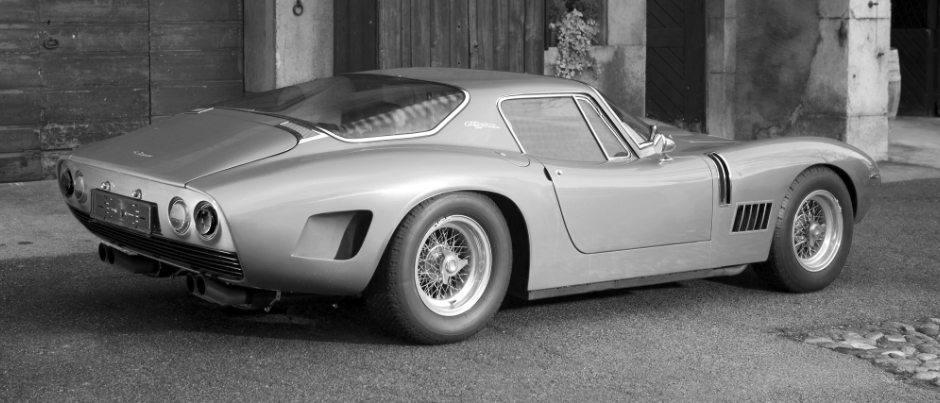

In [9]:
print(height, 'x', width)
display_channel(green, width)

### 2. convert green channel to tensor

In [10]:
green_tensor = tf.reshape(green,[-1, height, width, 1]) # convert to tensor
green_tensor

<tf.Tensor 'Reshape_1:0' shape=(1, 403, 940, 1) dtype=int32>

### 3. apply max pooling

In [11]:
pool = tf.layers.max_pooling2d(inputs=green_tensor, pool_size=[1, 1], strides=2)
pool

<tf.Tensor 'max_pooling2d/MaxPool:0' shape=(1, 202, 470, 1) dtype=int32>

### 4. back to list

In [12]:
list_pool = pool.eval().flatten()    

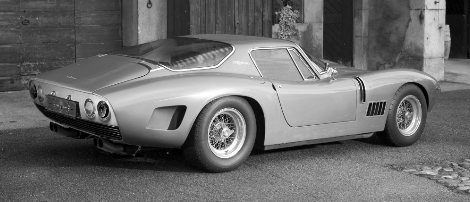

In [13]:
display_channel(list_pool, pool.shape[2].value)

In [21]:
sess.close()
del sess
del list_pool
del green

403 x 940


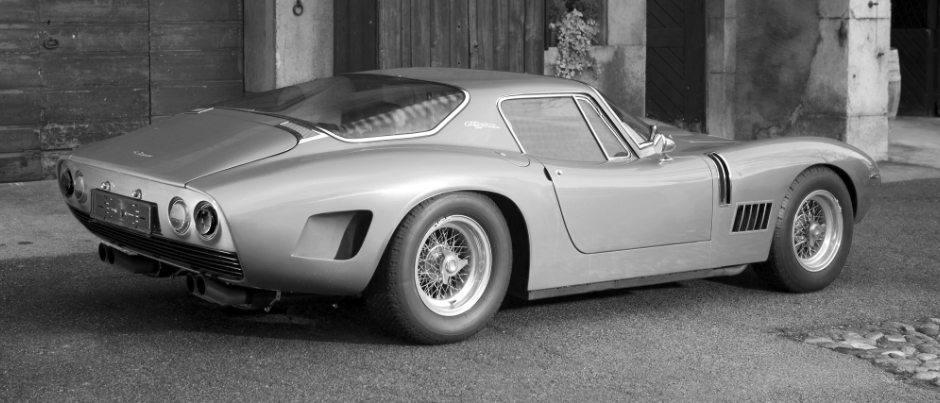

41  x  94


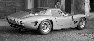

In [21]:
strides = 10
config = tf.ConfigProto(device_count = {'GPU': 0}) 
sess.close()
sess = tf.InteractiveSession(config=config)
image_file = './imgs/bizz.jpg'
[height, width ,red, green, blue] = image_meta(image_file)
print(height, 'x', width)
display_channel(green, width)

pool = tf.layers.max_pooling2d(inputs=tf.reshape(green,[-1, height, width, 1]), pool_size=1, strides=strides)
print(pool.shape[1].value,' x ', pool.shape[2].value)
display_channel(pool.eval().flatten() , pool.shape[2].value)
sess.close()